## Загрузка, изучение, предобработка данных

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AffinityPropagation
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
import os
import datetime as dt
import missingno as msno
import matplotlib.lines as lines
from wordcloud import WordCloud
import random
from PIL import Image
import matplotlib

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('DataEngineer.csv')

df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,Data Engineer,$80K-$150K (Glassdoor est.),Company Description\nSagence is a management a...,4.5,Sagence\n4.5,"New York, NY","Chicago, IL",1 to 50 employees,2009,Company - Private,Consulting,Business Services,$10 to $25 million (USD),"WCI Consulting, PwC",-1
1,Senior Data Engineer (Healthcare Domain experi...,$80K-$150K (Glassdoor est.),"Key Responsibilities\n\n- Architect, build, an...",3.4,Enterprise Integration\n3.4,"New York, NY","Jacksonville, FL",51 to 200 employees,1998,Company - Private,IT Services,Information Technology,$25 to $50 million (USD),-1,-1
2,Data Engineers,$80K-$150K (Glassdoor est.),Overview\n\nJob description\n\nPosition Overvi...,5.0,Maestro Technologies\n5.0,"New York, NY","Trenton, NJ",51 to 200 employees,2003,Company - Private,IT Services,Information Technology,$5 to $10 million (USD),-1,-1
3,Client Trade Support Engineer,$80K-$150K (Glassdoor est.),About the Position\n\n\nThis position will sup...,4.8,Jane Street\n4.8,"New York, NY","New York, NY",501 to 1000 employees,2000,Company - Private,Investment Banking & Asset Management,Finance,Unknown / Non-Applicable,-1,-1
4,Data Engineer,$80K-$150K (Glassdoor est.),Data Engineer\n\nJob Details\nLevel\nExperienc...,3.7,GNY Insurance Companies\n3.7,"New York, NY","New York, NY",201 to 500 employees,1914,Company - Private,Insurance Carriers,Insurance,$100 to $500 million (USD),"Travelers, Chubb, Crum & Forster",True


### Изучение данных

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2528 entries, 0 to 2527
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          2528 non-null   object 
 1   Salary Estimate    2528 non-null   object 
 2   Job Description    2528 non-null   object 
 3   Rating             2528 non-null   float64
 4   Company Name       2528 non-null   object 
 5   Location           2528 non-null   object 
 6   Headquarters       2528 non-null   object 
 7   Size               2528 non-null   object 
 8   Founded            2528 non-null   int64  
 9   Type of ownership  2528 non-null   object 
 10  Industry           2528 non-null   object 
 11  Sector             2528 non-null   object 
 12  Revenue            2528 non-null   object 
 13  Competitors        2528 non-null   object 
 14  Easy Apply         2528 non-null   object 
dtypes: float64(1), int64(1), object(13)
memory usage: 296.4+ KB


In [5]:
df.isnull().sum()

Job Title            0
Salary Estimate      0
Job Description      0
Rating               0
Company Name         0
Location             0
Headquarters         0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
Competitors          0
Easy Apply           0
dtype: int64

- пустые значения во всех столбцах отсутствуют

In [6]:
df.drop_duplicates(inplace= True)

In [7]:
# import time
# for i in range(int(np.ceil(df['company_name'].size/50))):
#     print(df['company_name'].value_counts().sort_index()[i*50:i*50+50])
#     time.sleep(5)

In [8]:
# import time
# for i in range(int(np.ceil(df['job_title'].size/50))):
#     print(df['job_title'].value_counts().sort_index()[i*50:i*50+50])
#     time.sleep(5)

- удалила явные дубликаты.  
Для выявления неявных дубликатов (ошибки в написании, разные форматы и т.д.) можно использовать построчный просмотр с дальнейшим приведением к единому варианту написания. В тренировочном кейсе этой задачей можно принебречь.

In [9]:
df.columns = [x.lower().replace(' ', '_') for x in df.columns]

- для удобства обращения переименовала столбцы (убрала верхний регистр и пробел заменила подчеркиванием)

Т.к. в названии компании присутствует оценка (рейтинг) которая дублирует одноименную отдельную колонку можно для удобочитаемости убрать лишние данные

In [10]:
df['company_name'].replace(r'\n.*','', regex=True, inplace=True)

### Оформление визуализации в единой палитре согласно бизнес требованию "В графиках использовать основные цвета сайта hh.ru"

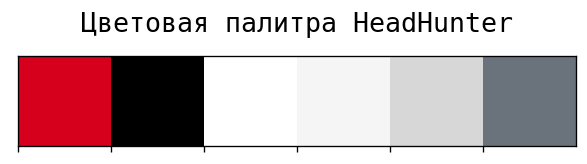

In [11]:
plt.rcParams['figure.dpi'] = 120
sns.palplot(['#d6001c', '#000', '#fff','#f5f5f5', '#d7d7d7', '#6a737b'])
plt.title("Цветовая палитра HeadHunter", loc='center', fontfamily='monospace', fontsize=16, y=1.15)
plt.show()

## Бизнес задачи
1. Построить график компаний с самым большим кол-вом вакансий
2. Построить график самых популярный названий в вакансиях
3. Построить график самых популярных местоположений вакансий по их численности и построить круговую диаграмму
4. Построить график популярности по колонке Type of ownership, относительно численности вакансий
5. Построить график популярности по секторам работы. Построить график используя сектора работы и средний уровень зарплат в них
6. Построить гистограмму распределения рейтинга компаний
7. Построить график средних зарплат по популярным компаниям
8. Построить описаний вакансий облако тегов, исследовать самые популярные слова

In [12]:
df.columns

Index(['job_title', 'salary_estimate', 'job_description', 'rating',
       'company_name', 'location', 'headquarters', 'size', 'founded',
       'type_of_ownership', 'industry', 'sector', 'revenue', 'competitors',
       'easy_apply'],
      dtype='object')

### Задача 1
Построить график компаний с самым большим кол-вом вакансий.  
Для этого сгруппируем данные по названию компании (company_name) и получим топ-10 с наибольшим числом вакансий

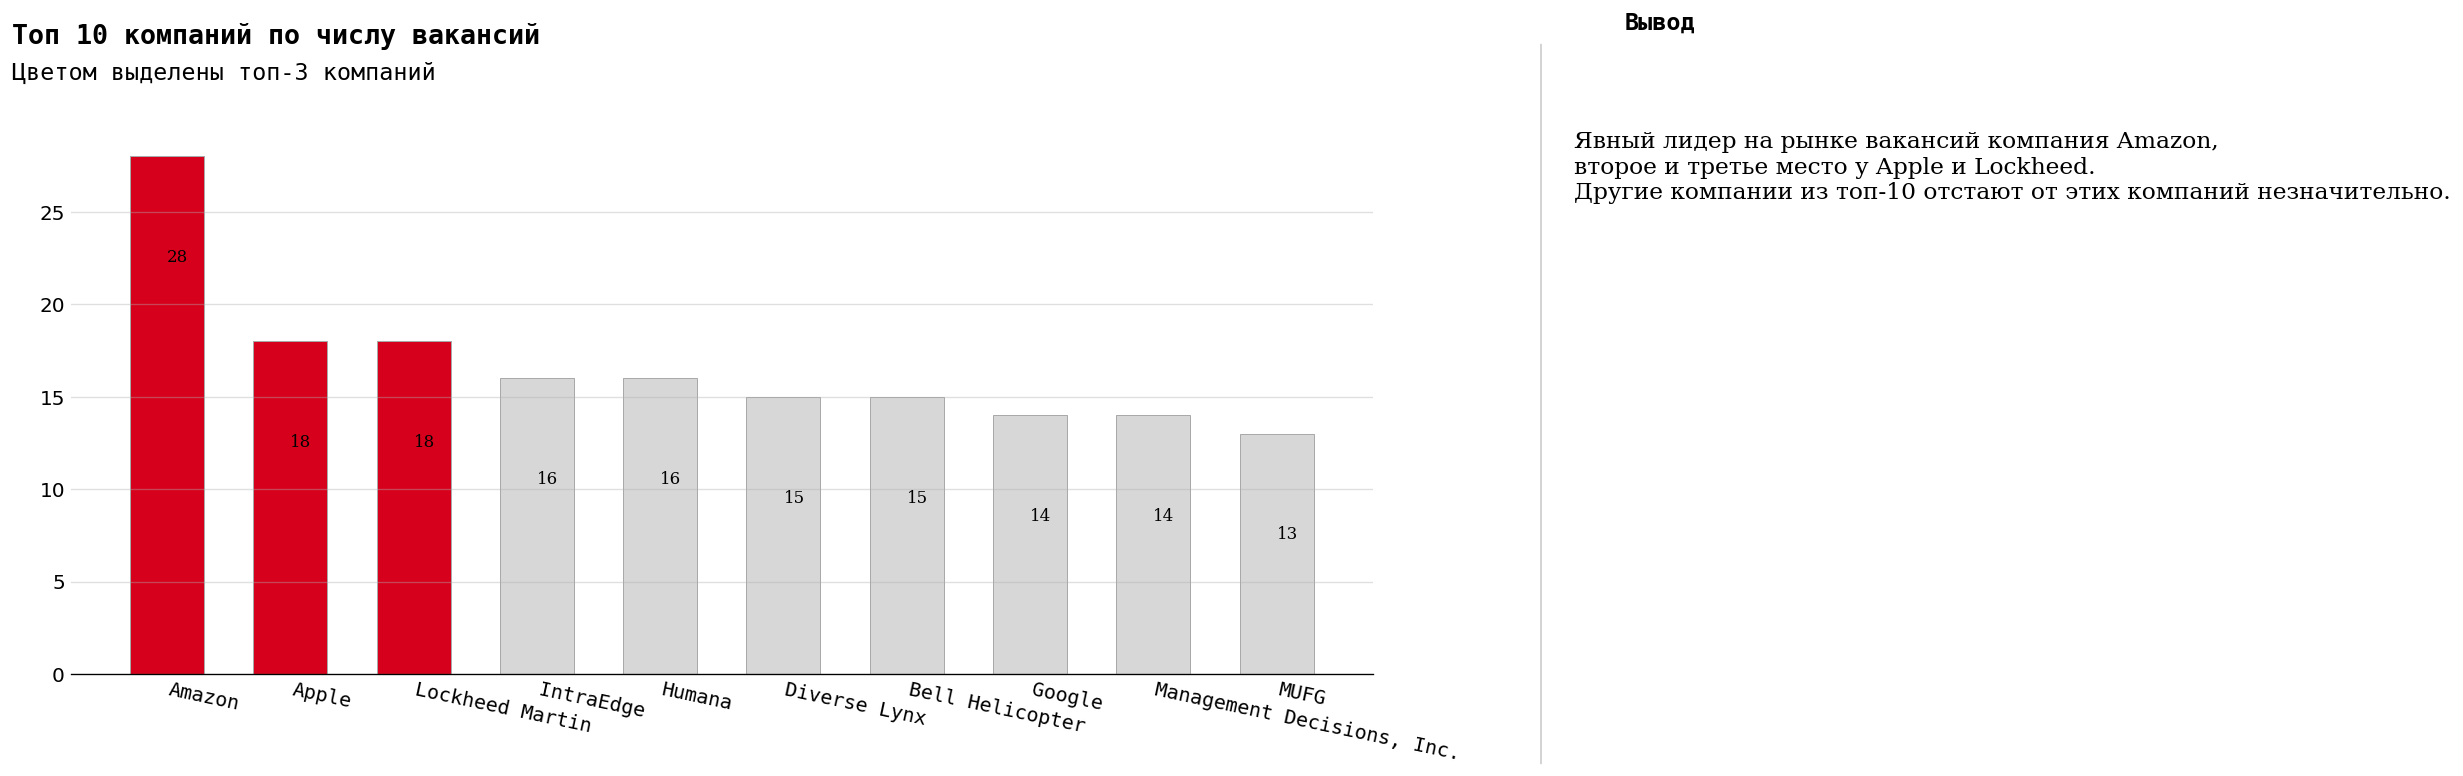

In [13]:
group_company = df.groupby('company_name').agg({'job_title':'count'}).sort_values(by='job_title',ascending=False)[:10]

color_map = ['#d7d7d7' for _ in range(10)]
color_map[0] = color_map[1] = color_map[2] =  '#d6001c' # top-3

fig, ax = plt.subplots(1,1, figsize=(14, 6))
ax.bar(group_company.index, group_company.job_title, width=0.6, 
       edgecolor='darkgray',
       linewidth=0.6, color=color_map)

for i in group_company.index:
    ax.annotate(f"{group_company.loc[i,'job_title']}", 
                   xy=(i, group_company.loc[i,'job_title'] - 5), 
                   va = 'top', ha='left',fontweight='light', fontfamily='serif')

for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)

ax.set_xticklabels(group_company.index, va='top', ha='left', fontfamily='monospace', rotation=-12, )

fig.text(0.09, 1, 'Топ 10 компаний по числу вакансий', fontsize=16, fontweight='bold', fontfamily='monospace')
fig.text(0.09, 0.95, 'Цветом выделены топ-3 компаний', fontsize=14, fontweight='light', fontfamily='monospace')

fig.text(1.05, 1.02, 'Вывод', fontsize=14, fontweight='bold', fontfamily='monospace')

fig.text(1.02, 0.75, '''
Явный лидер на рынке вакансий компания Amazon, 
второе и третье место у Apple и Lockheed. 
Другие компании из топ-10 отстают от этих компаний незначительно.
'''
         , fontsize=14, fontweight='light', fontfamily='serif')

ax.grid(axis='y', linestyle='-', alpha=0.4)   


ax.tick_params(axis='both', which='major', labelsize=12)


l1 = lines.Line2D([1, 1], [0, 1], transform=fig.transFigure, figure=fig,color='black',lw=0.2)
fig.lines.extend([l1])

ax.tick_params(axis=u'both', which=u'both',length=0)

plt.show()


### Задача 2
Построить график самых популярный названий в вакансиях.  
Для этого сгруппируем данные по названию вакансии (job_title) и получим топ-10 по популярности

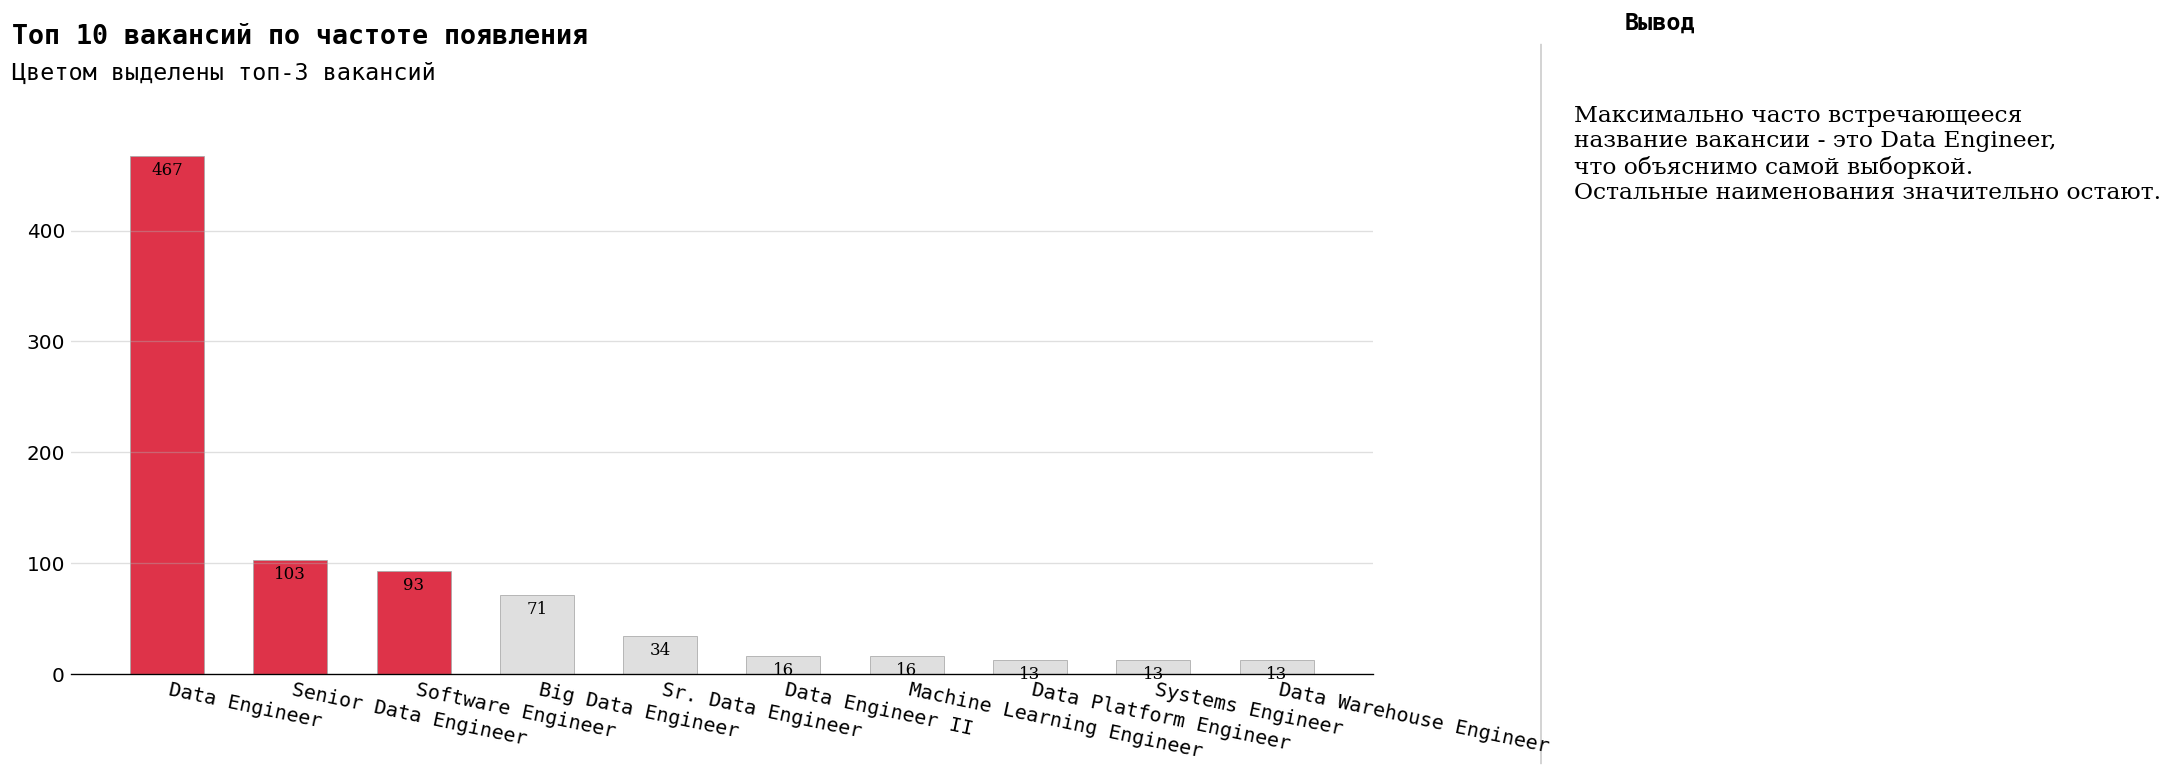

In [14]:
group_vacancy = df.groupby('job_title').agg({'company_name':'count'}).sort_values(by='company_name',ascending=False)[:10]

color_map = ['#d7d7d7' for _ in range(10)]
color_map[0] = color_map[1] = color_map[2] =  '#d6001c' # top-3

fig, ax = plt.subplots(1,1, figsize=(14, 6))
ax.bar(group_vacancy.index, group_vacancy.company_name, width=0.6, 
       edgecolor='darkgray',
       alpha=.8,
       linewidth=0.6, 
       color=color_map)

for i in group_vacancy.index:
    ax.annotate(f"{group_vacancy.loc[i,'company_name']}", 
                   xy=(i, group_vacancy.loc[i,'company_name'] - 5), 
                   va = 'top', ha='center',fontweight='light', fontfamily='serif')

for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)

ax.set_xticklabels(group_vacancy.index, va='top', ha='left', fontfamily='monospace', rotation=-12, )

fig.text(0.09, 1, 'Топ 10 вакансий по частоте появления', fontsize=16, fontweight='bold', fontfamily='monospace')
fig.text(0.09, 0.95, 'Цветом выделены топ-3 вакансий', fontsize=14, fontweight='light', fontfamily='monospace')

fig.text(1.05, 1.02, 'Вывод', fontsize=14, fontweight='bold', fontfamily='monospace')

fig.text(1.02, 0.75, '''
Максимально часто встречающееся 
название вакансии - это Data Engineer, 
что объяснимо самой выборкой. 
Остальные наименования значительно остают.
'''
         , fontsize=14, fontweight='light', fontfamily='serif')

ax.grid(axis='y', linestyle='-', alpha=0.4)   


ax.tick_params(axis='both', which='major', labelsize=12)


l1 = lines.Line2D([1, 1], [0, 1], transform=fig.transFigure, figure=fig,color='black',lw=0.2)
fig.lines.extend([l1])

ax.tick_params(axis=u'both', which=u'both',length=0)

plt.show()


### Задача 3
Построить график самых популярных местоположений вакансий по их численности и построить круговую диаграмму

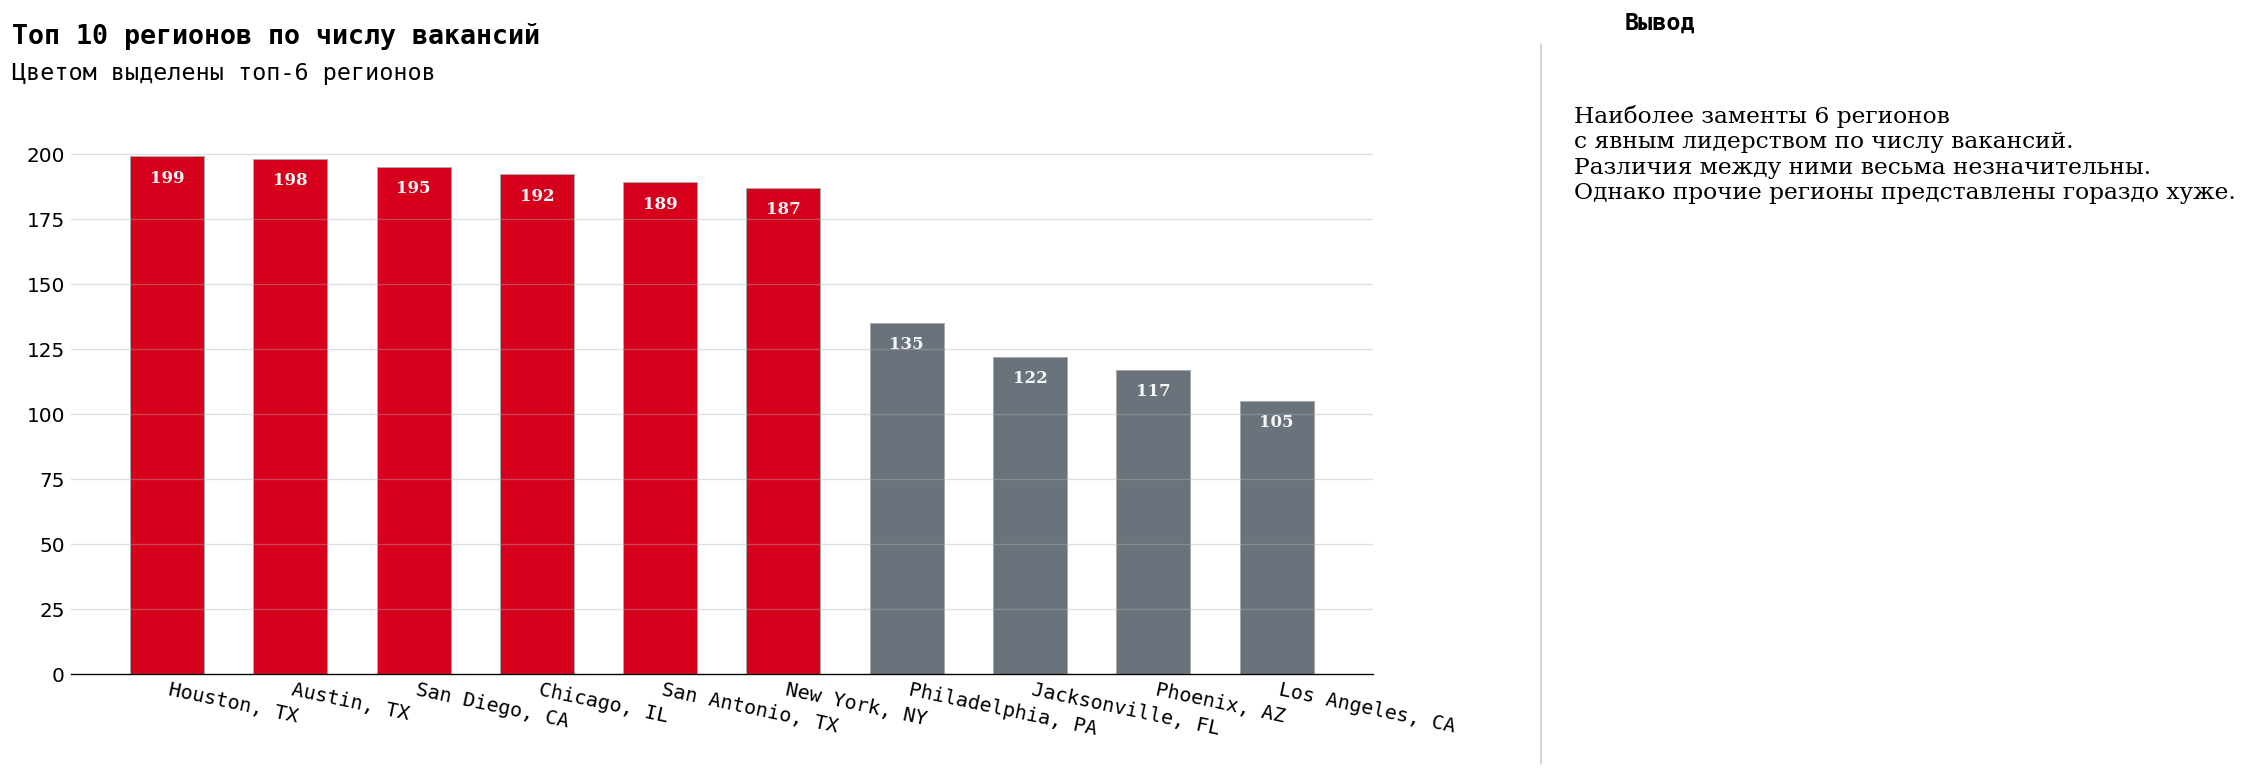

In [15]:
group_region= df.groupby('location').agg({'job_title':'count'}).sort_values(by='job_title',ascending=False)[:10]

color_map = ['#6a737b' for _ in range(10)]
color_map[0] = color_map[1] = color_map[2] = color_map[3] = color_map[4] = color_map[5] = '#d6001c' # top-6

fig, ax = plt.subplots(1,1, figsize=(14, 6))
ax.bar(group_region.index, group_region.job_title, width=0.6, 
       edgecolor='darkgray',
       linewidth=0.6, color=color_map)

for i in group_region.index:
    ax.annotate(f"{group_region.loc[i,'job_title']}", 
                   xy=(i, group_region.loc[i,'job_title'] - 5), 
                   va = 'top', ha='center', fontweight='bold', fontfamily='serif', color='#f5f5f5')

for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)

ax.set_xticklabels(group_region.index, va='top', ha='left', fontfamily='monospace', rotation=-12, )

fig.text(0.09, 1, 'Топ 10 регионов по числу вакансий', fontsize=16, fontweight='bold', fontfamily='monospace')
fig.text(0.09, 0.95, 'Цветом выделены топ-6 регионов', fontsize=14, fontweight='light', fontfamily='monospace')

fig.text(1.05, 1.02, 'Вывод', fontsize=14, fontweight='bold', fontfamily='monospace')

fig.text(1.02, 0.75, '''
Наиболее заменты 6 регионов
с явным лидерством по числу вакансий.
Различия между ними весьма незначительны.
Однако прочие регионы представлены гораздо хуже.
'''
         , fontsize=14, fontweight='light', fontfamily='serif')

ax.grid(axis='y', linestyle='-', alpha=0.4)   

ax.tick_params(axis='both', which='major', labelsize=12)

l1 = lines.Line2D([1, 1], [0, 1], transform=fig.transFigure, figure=fig,color='black',lw=0.2)
fig.lines.extend([l1])

ax.tick_params(axis=u'both', which=u'both',length=0)

plt.show()


In [16]:
top_10_region = group_region.index.to_list()
group_region_total = df.groupby('location', as_index=False).agg({'job_title':'count'}).sort_values(by='job_title',ascending=False)
group_region_total['region'] = group_region_total.location.where(group_region_total.location.isin(top_10_region), 'other')
group_region_total = group_region_total.groupby('region', as_index=False).agg({'job_title':'count'}).sort_values(by='job_title',ascending=False)

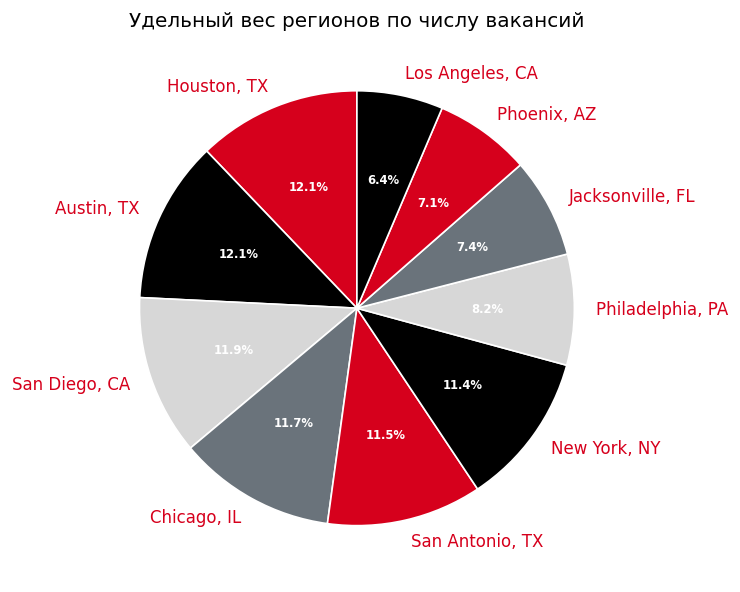

In [17]:
plt.figure(figsize=(6,6))
color_map = ['#d6001c', '#000', '#d7d7d7', '#6a737b', ]
wedges, texts, autotexts  = plt.pie(
    x=group_region.job_title,
    labels=group_region.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=color_map,
    wedgeprops={'capstyle':'butt', 'ec':'w'},
    
)
plt.setp(autotexts, size=7, weight="bold")
[text.set_color('#d6001c') for text in texts]
[autotext.set_color('#fff') for autotext in autotexts]
plt.title('Удельный вес регионов по числу вакансий')
plt.show()

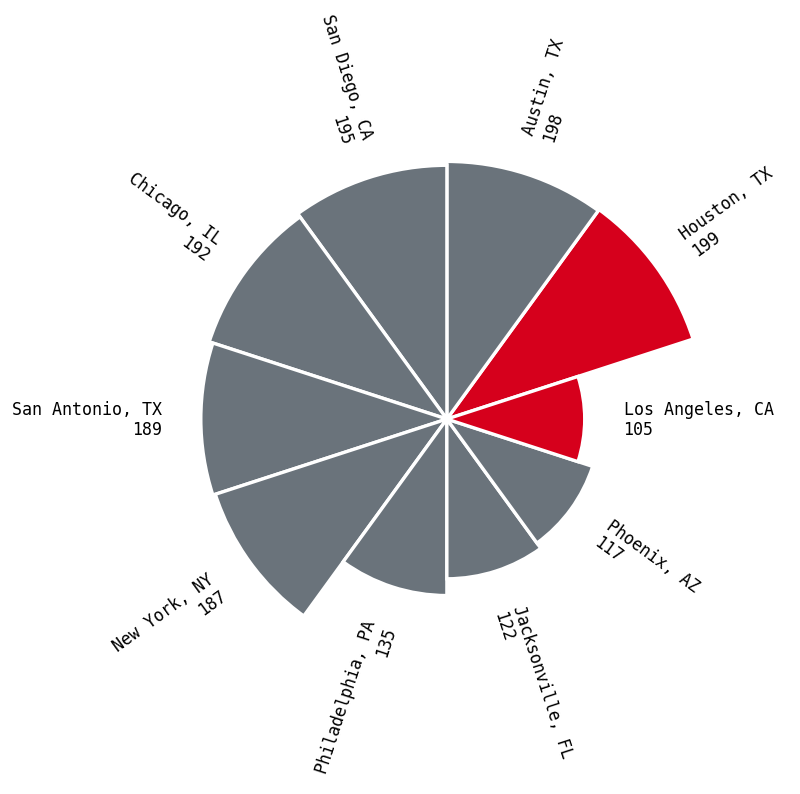

In [18]:
color_map = ['#6a737b' for _ in range(10)]
color_map[0] = color_map[9] =  '#d6001c' # color highlight

plt.figure(figsize=(6,6))
ax = plt.subplot(111, polar=True)
plt.axis('off')

# Constants = parameters controling the plot layout:
upperLimit = 30
lowerLimit = 1
labelPadding = 30

# Compute max and min in the dataset
max = group_region['job_title'].max()
min = group_region['job_title'].min()

# Let's compute heights: they are a conversion of each item value in those new coordinates
# In our example, 0 in the dataset will be converted to the lowerLimit (10)
# The maximum will be converted to the upperLimit (100)
slope = (max - lowerLimit) / max
heights = slope * group_region.job_title + lowerLimit

# Compute the width of each bar. In total we have 2*Pi = 360°
width = 2*np.pi / len(group_region.index)

# Compute the angle each bar is centered on:
indexes = list(range(1, len(group_region.index)+1))
angles = [element * width for element in indexes]
angles

# Draw bars
bars = ax.bar(
    x=angles, 
    height=heights, 
    width=width, 
    bottom=lowerLimit,
    linewidth=2, 
    edgecolor="white",
    color=color_map,
)

# Add labels
for bar, angle, height, label1, label2 in zip(bars, angles, heights, group_region.index, group_region.job_title):
    # Labels are rotated. Rotation must be specified in degrees 
    rotation = np.rad2deg(angle)

    # Flip some labels upside down
    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"

    # Finally add the labels
    ax.text(
        x=angle, 
        y=lowerLimit + bar.get_height() + labelPadding, 
        s=label1+'\n'+str(label2), 
        ha=alignment, fontsize=10,fontfamily='monospace',
        va='center', 
        rotation=rotation, 
        rotation_mode="anchor") 

### Задача 4
Построить график популярности по колонке Type of ownership, относительно численности вакансий

In [19]:
df['type_of_ownership'].value_counts()

Company - Private                 1387
Company - Public                   750
Subsidiary or Business Segment     125
-1                                 118
Nonprofit Organization              48
Unknown                             30
Government                          21
College / University                12
Contract                            10
Private Practice / Firm              6
Other Organization                   4
Hospital                             3
Self-employed                        1
School / School District             1
Name: type_of_ownership, dtype: int64

Среди значений есть видов собственности команий "Unknown" и "-1", их можно объединить в одну группу "NA".  
Также можно сгруппировать близкие по смыслу "College / University" и "School / School District" в группу "Education"

In [20]:
df['type_of_ownership'] = df.type_of_ownership.where(~df.type_of_ownership.isin(("Unknown", "-1")), 'NA')
df['type_of_ownership'] = df.type_of_ownership.where(~df.type_of_ownership.isin(("School / School District", "College / University")), 'Education')

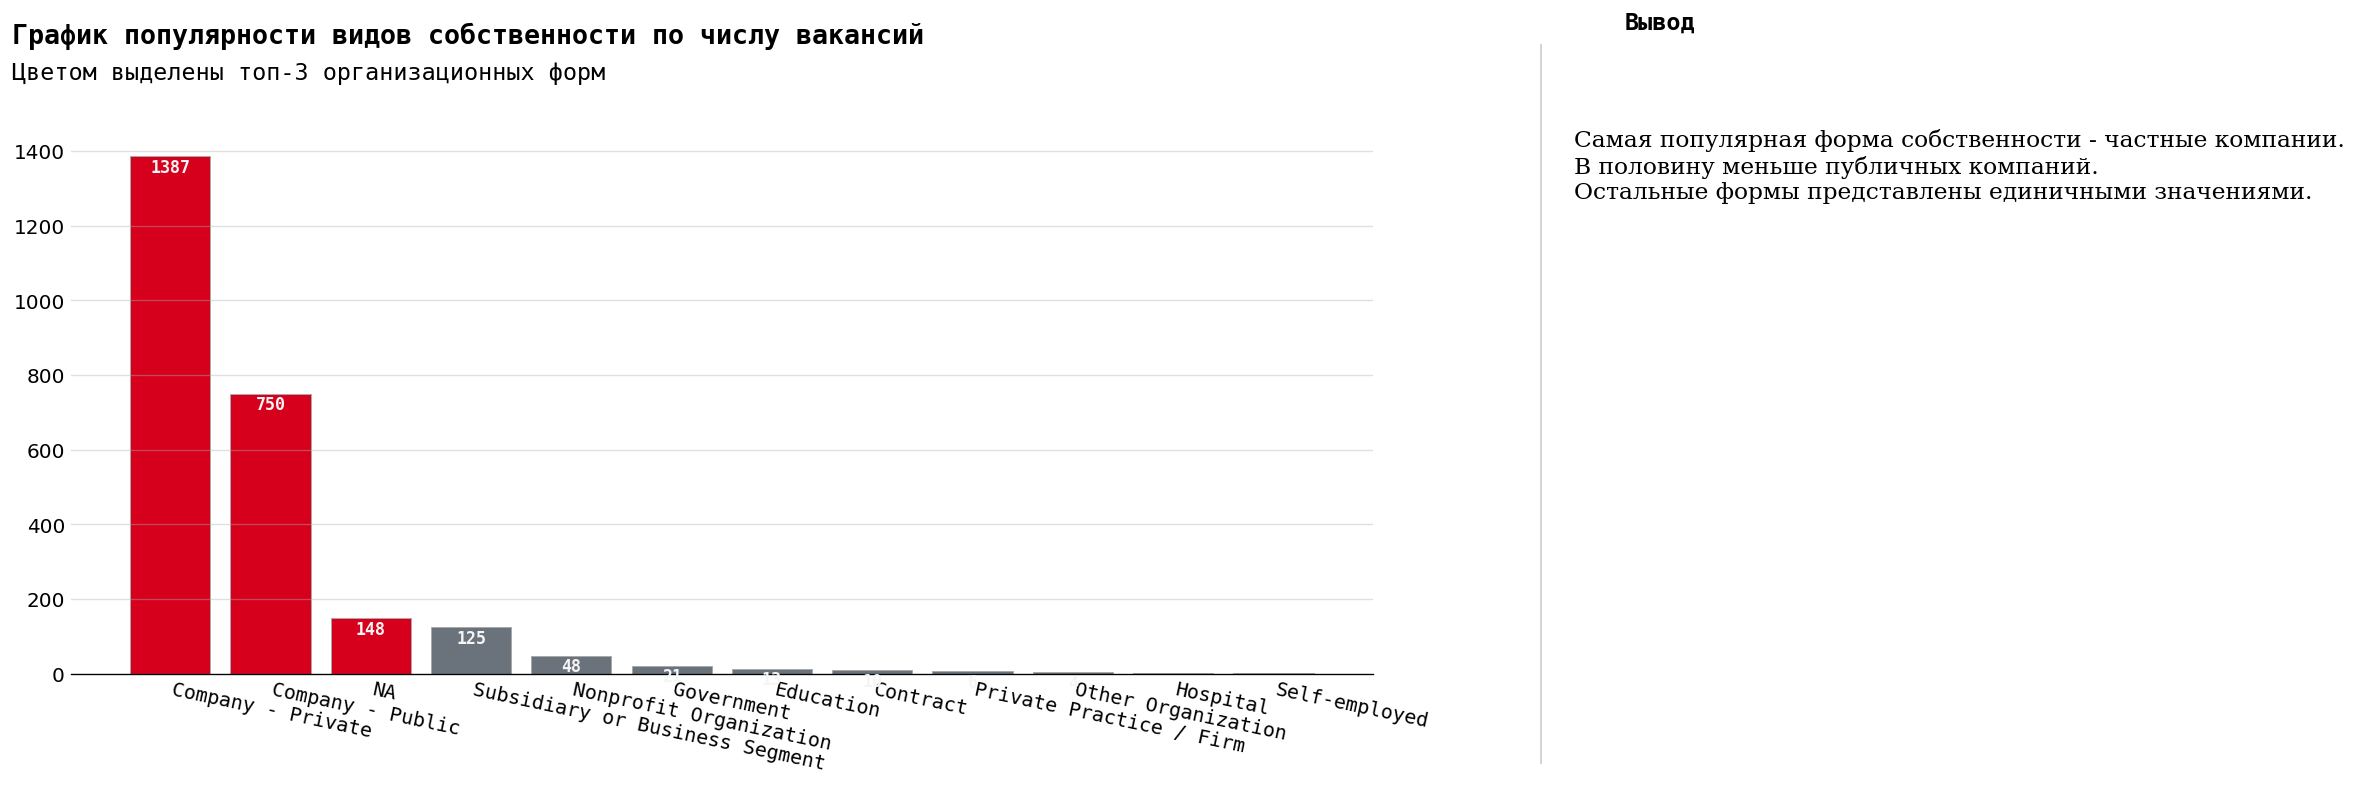

In [21]:
group_ownership= df['type_of_ownership'].value_counts()

color_map = ['#6a737b' for _ in range(10)]
color_map[0] = color_map[1] = color_map[2] = '#d6001c' # top-3

fig, ax = plt.subplots(1,1, figsize=(14, 6))
ax.bar(group_ownership.index, group_ownership, width=0.8, 
       edgecolor='darkgray',
       linewidth=0.6, color=color_map)

for i in group_ownership.index:
    ax.annotate(f"{group_ownership[i]}", 
                   xy=(i, group_ownership[i] - 5), 
                   va = 'top', ha='center', fontweight='bold', fontfamily='monospace', color='#f5f5f5')

for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)

ax.set_xticklabels(group_ownership.index, va='top', ha='left', fontfamily='monospace', rotation=-12, )

fig.text(0.09, 1, 'График популярности видов собственности по числу вакансий', fontsize=16, fontweight='bold', fontfamily='monospace')
fig.text(0.09, 0.95, 'Цветом выделены топ-3 организационных форм', fontsize=14, fontweight='light', fontfamily='monospace')

fig.text(1.05, 1.02, 'Вывод', fontsize=14, fontweight='bold', fontfamily='monospace')

fig.text(1.02, 0.75, '''
Самая популярная форма собственности - частные компании.
В половину меньше публичных компаний.
Остальные формы представлены единичными значениями.
'''
         , fontsize=14, fontweight='light', fontfamily='serif')

ax.grid(axis='y', linestyle='-', alpha=0.4)   

ax.tick_params(axis='both', which='major', labelsize=12)

l1 = lines.Line2D([1, 1], [0, 1], transform=fig.transFigure, figure=fig,color='black',lw=0.2)
fig.lines.extend([l1])

ax.tick_params(axis=u'both', which=u'both',length=0)

plt.show()


### Задача 5
Построить график популярности по секторам работы. Построить график используя сектора работы и средний уровень зарплат в них

Для удобства восприятия заменим значение "-1" на "NA".

In [22]:
df['industry'] = df.industry.where(df.industry != "-1", 'NA')

In [23]:
df['industry'].value_counts()

NA                                       376
IT Services                              351
Computer Hardware & Software             244
Staffing & Outsourcing                   202
Internet                                 144
                                        ... 
Gas Stations                               1
Fast-Food & Quick-Service Restaurants      1
Photography                                1
Vehicle Dealers                            1
Trucking                                   1
Name: industry, Length: 84, dtype: int64

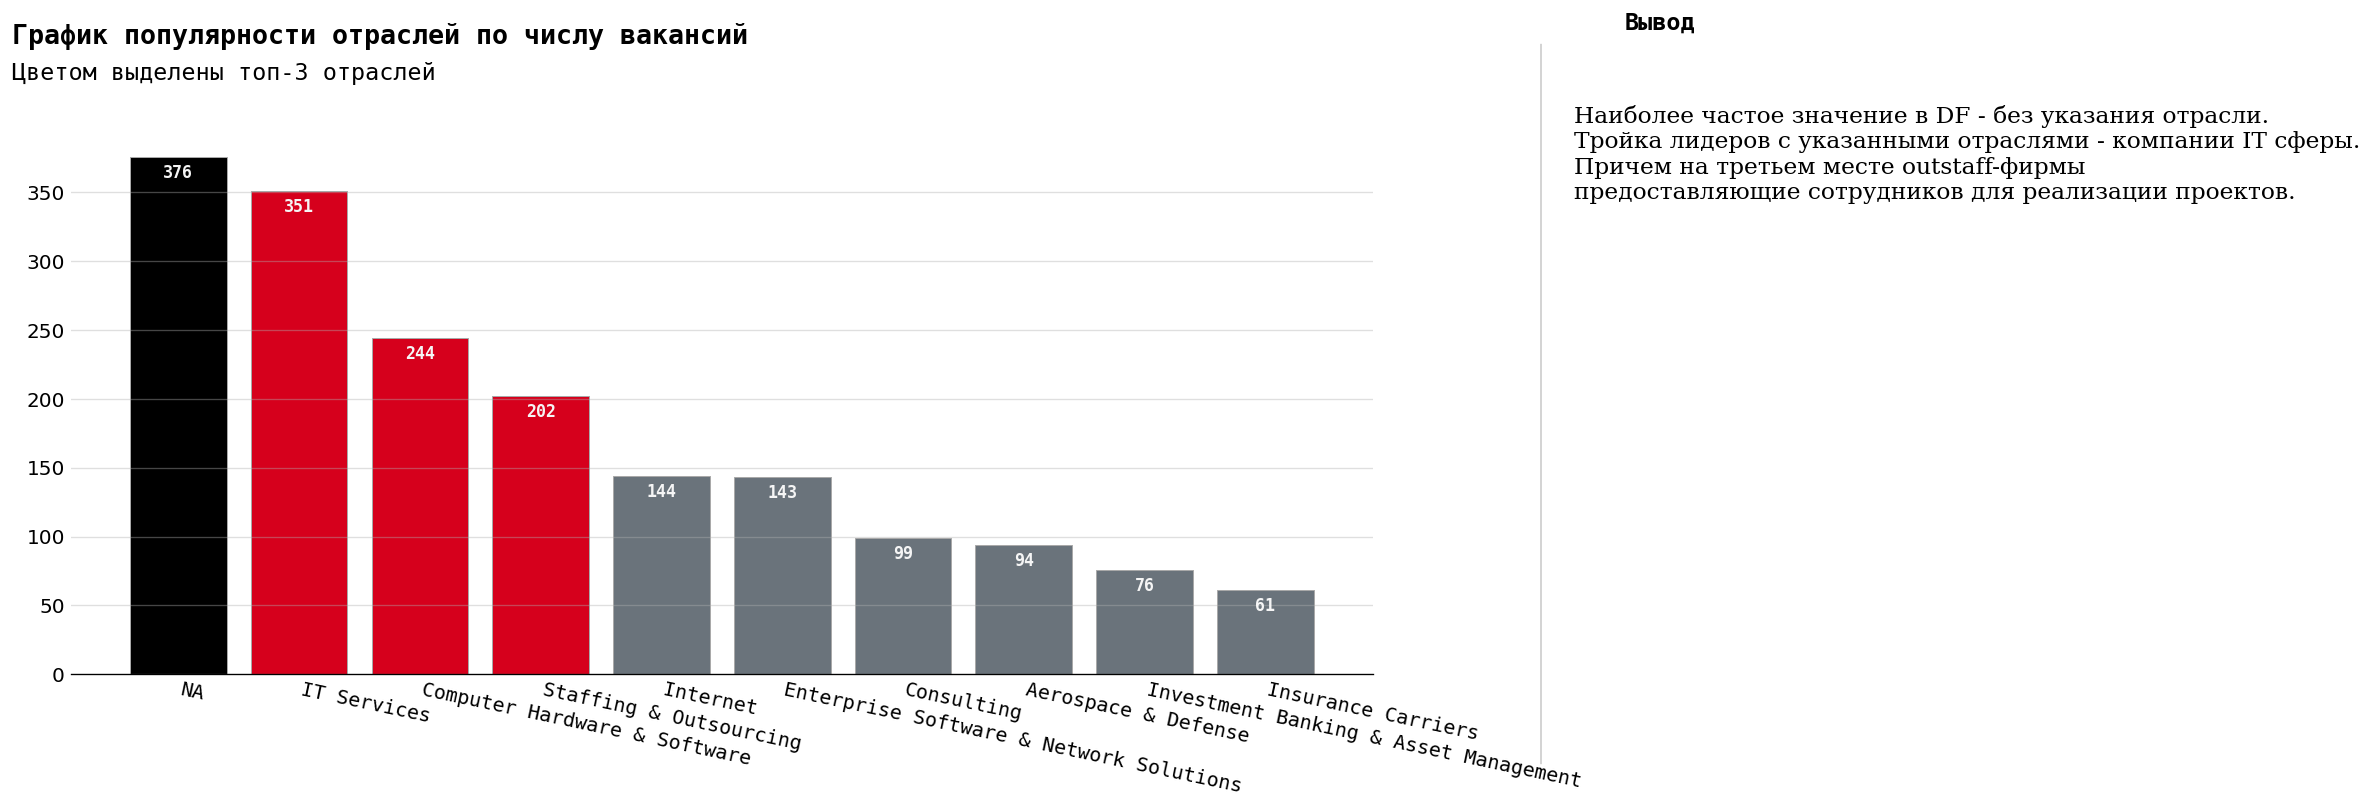

In [24]:
group_industry= df['industry'].value_counts()[:10]

color_map = ['#6a737b' for _ in range(10)]
color_map[0] = '#000'
color_map[1] = color_map[2] = color_map[3] = '#d6001c' # top-3

fig, ax = plt.subplots(1,1, figsize=(14, 6))
ax.bar(group_industry.index, group_industry, width=0.8, 
       edgecolor='darkgray',
       linewidth=0.6, color=color_map)

for i in group_industry.index:
    ax.annotate(f"{group_industry[i]}", 
                   xy=(i, group_industry[i] - 5), 
                   va = 'top', ha='center', fontweight='bold', fontfamily='monospace', color='#f5f5f5')

for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)

ax.set_xticklabels(group_industry.index, va='top', ha='left', fontfamily='monospace', rotation=-12, )

fig.text(0.09, 1, 'График популярности отраслей по числу вакансий', fontsize=16, fontweight='bold', fontfamily='monospace')
fig.text(0.09, 0.95, 'Цветом выделены топ-3 отраслей', fontsize=14, fontweight='light', fontfamily='monospace')

fig.text(1.05, 1.02, 'Вывод', fontsize=14, fontweight='bold', fontfamily='monospace')

fig.text(1.02, 0.75, '''
Наиболее частое значение в DF - без указания отрасли.
Тройка лидеров с указанными отраслями - компании IT сферы.
Причем на третьем месте outstaff-фирмы
предоставляющие сотрудников для реализации проектов. 
'''
         , fontsize=14, fontweight='light', fontfamily='serif')

ax.grid(axis='y', linestyle='-', alpha=0.4)   

ax.tick_params(axis='both', which='major', labelsize=12)

l1 = lines.Line2D([1, 1], [0, 1], transform=fig.transFigure, figure=fig,color='black',lw=0.2)
fig.lines.extend([l1])

ax.tick_params(axis=u'both', which=u'both',length=0)

plt.show()


In [25]:
df.salary_estimate.value_counts()

$60K-$109K (Glassdoor est.)    56
$75K-$135K (Glassdoor est.)    44
$82K-$130K(Employer est.)      41
$94K-$166K (Glassdoor est.)    32
$79K-$96K (Glassdoor est.)     32
                               ..
$37K-$75K (Glassdoor est.)      8
$70K-$138K (Glassdoor est.)     8
$57K-$92K (Glassdoor est.)      7
$58K-$94K (Glassdoor est.)      7
$57K-$97K (Glassdoor est.)      5
Name: salary_estimate, Length: 91, dtype: int64

Оценка зарплат в компании представлена по двум типам наблюдений (внутреннему и внешнему). Для нашей аналитики канал получения данных не важен. Очистим данные о зарплатах и приведем к числовому формату, чтобы можно было использовать в расчетах.   
Для визуализации возьмем среднее арифметическое между максимальным и минимальным значением зарплаты по каждой компании и переведем в тысячи долларов.

In [26]:
df['salary'] = df['salary_estimate'].str.replace('\(.*','').str.replace('K','000').str.replace('$','').str.strip()
df[['salary_min', 'salary_max']] = df.salary.str.split('-', expand=True)
df = df.astype({'salary_min':'int64', 'salary_max':'int64'})
df['salary'] = ((df.salary_min + df.salary_max)/2000).round(2)
df.drop(columns=['salary_min', 'salary_max'], inplace=True)

In [27]:
group_industry_salary = df.groupby('industry').agg(
    {'job_title':'count', 'salary':'mean'}).sort_values(
    by='job_title',ascending=False)[:10].round(2)

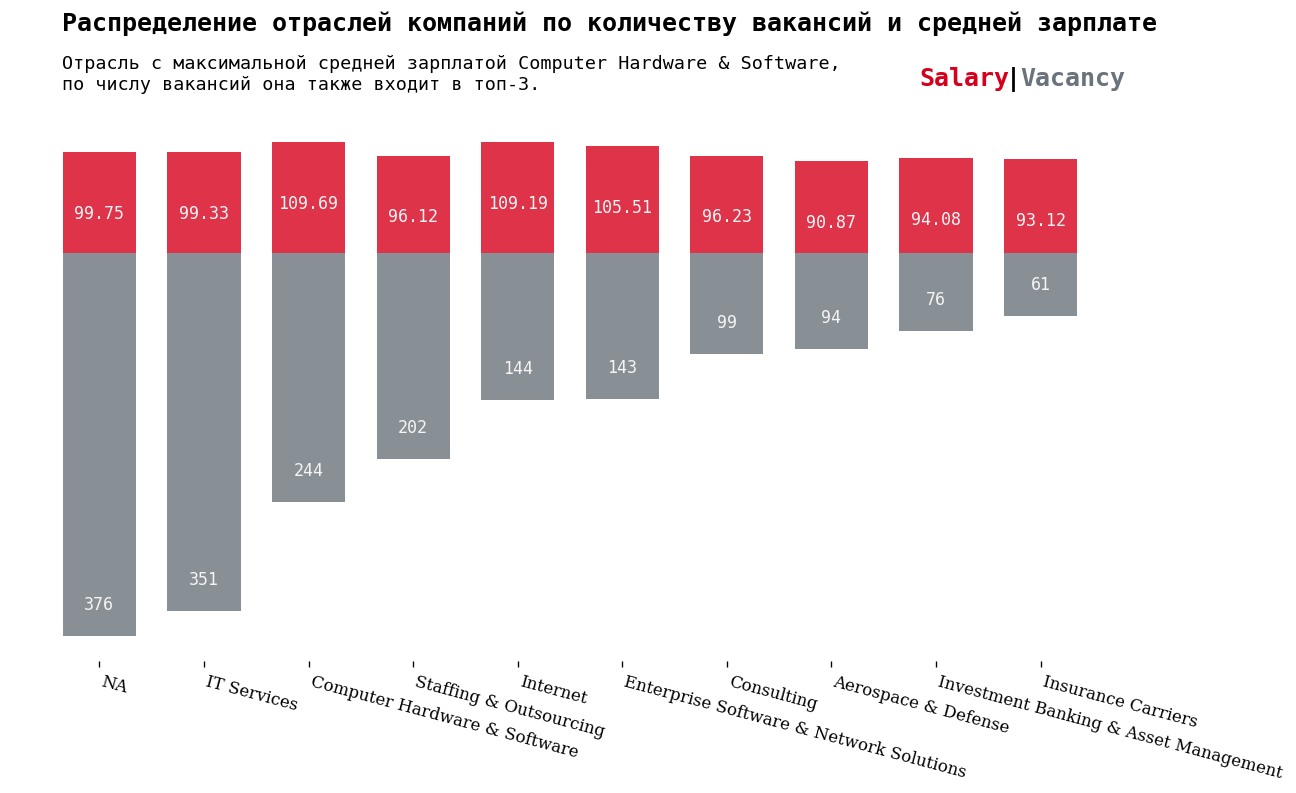

In [28]:
fig, ax = plt.subplots(1,1, figsize=(12, 6))
ax.bar(group_industry_salary.index, group_industry_salary.salary, width=0.7, color='#d6001c', alpha=0.8, label='salary')
ax.bar(group_industry_salary.index, -group_industry_salary.job_title, width=0.7, color='#6a737b', alpha=0.8, label='vacancy')

# Annotations
for i in group_industry_salary.index:
    ax.annotate(f"{group_industry_salary.loc[i, 'salary']}", 
                   xy=(i, group_industry_salary.loc[i, 'salary'] - 60),
                   va = 'center', ha='center',fontweight='light', fontfamily='monospace',
                   color='#f5f5f5')   

for i in group_industry_salary.index:
    ax.annotate(f"{group_industry_salary.loc[i, 'job_title']}", 
                   xy=(i, -group_industry_salary.loc[i, 'job_title'] + 40 ),
                   va = 'top', ha='center',fontweight='light', fontfamily='monospace',
                   color='#f5f5f5'
               )
    
 

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)

ax.set_xticklabels(group_industry_salary.index, fontfamily='serif', rotation=-15, va='top', ha='left',)
ax.set_yticks([])    

ax.legend().set_visible(False)
fig.text(0.16, 1, 'Распределение отраслей компаний по количеству вакансий и средней зарплате', fontsize=15, fontweight='bold', fontfamily='monospace')
fig.text(0.16, 0.89, 
'''Отрасль с максимальной средней зарплатой Computer Hardware & Software,
по числу вакансий она также входит в топ-3.
'''

, fontsize=11, fontweight='light', fontfamily='monospace')


fig.text(0.755,0.924,"Salary", fontweight="bold", fontfamily='monospace', fontsize=15, color='#d6001c')
fig.text(0.815,0.924,"|", fontweight="bold", fontfamily='monospace', fontsize=15, color='black')
fig.text(0.825,0.924,"Vacancy", fontweight="bold", fontfamily='monospace', fontsize=15, color='#6a737b')

plt.show()

### Задача 6
Построить гистограмму распределения рейтинга компаний

Для удобства восприятия заменим значение "-1" на "0".

In [29]:
group_rating = df[['rating', 'company_name']]
group_rating['rating'] = group_rating.rating.where(group_rating.rating != -1, 0)

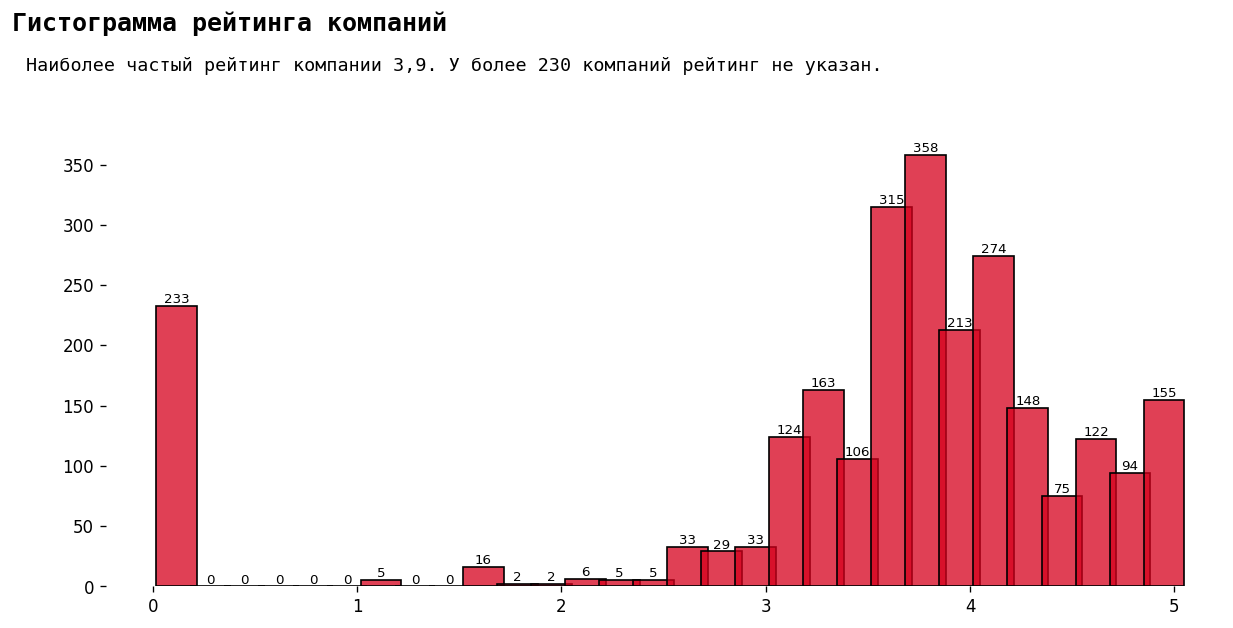

In [30]:
fig, ax = plt.subplots(1, 1, figsize=(12, 5))
chart = sns.histplot(
    bins=30,
    data=group_rating,
    x='rating',
    color='#d6001c',
    shrink=.8)

for patch in ax.patches :
        current_width = patch.get_width()
        patch.set_width(.2)

chart.bar_label(chart.containers[0], size=8)

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)

ax.set_xlabel('')
ax.set_ylabel('')

fig.text(0.06, 1.05, 'Гистограмма рейтинга компаний', fontsize=15, fontweight='bold', fontfamily='monospace')
fig.text(0.07, 0.95, 
'''Наиболее частый рейтинг компании 3,9. У более 230 компаний рейтинг не указан. 
'''

, fontsize=11, fontweight='light', fontfamily='monospace')

plt.show()

### Задача 7
Построить график средних зарплат по популярным компаниям

In [31]:
top_companies_salary = df.query("rating==5").reset_index(drop=True)

In [32]:
group_top_companies_salary = top_companies_salary.groupby('company_name').agg({'salary':'mean'}).round(2)

In [33]:
group_top_companies_salary.median()

salary    104.875
dtype: float64

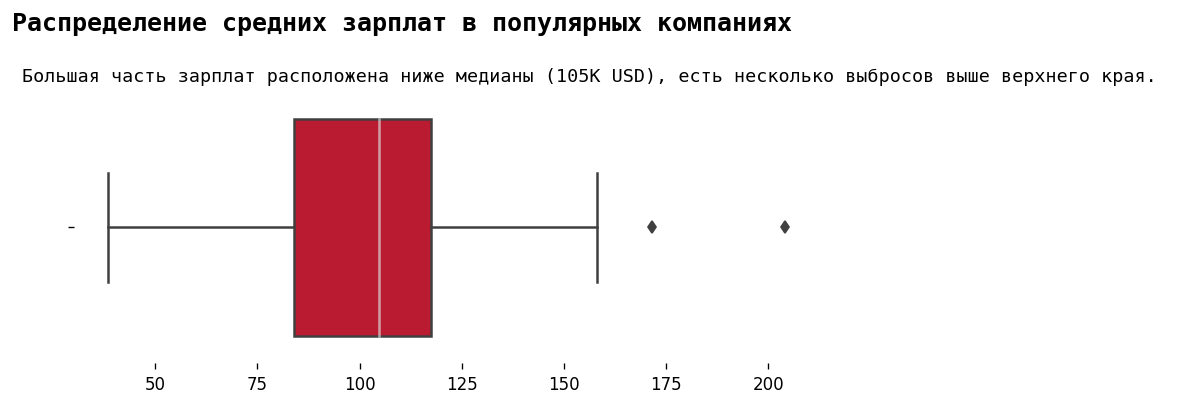

In [34]:
fig, ax = plt.subplots(1, 1, figsize=(8, 3))
box_plot = sns.boxplot(
    data=group_top_companies_salary,
    x='salary',
    color='#d6001c',
    medianprops=dict(color="#d7d7d7", alpha=0.7)
)

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)

ax.set_xlabel('')
ax.set_ylabel('')

fig.text(0.06, 1.05, 'Распределение средних зарплат в популярных компаниях', fontsize=15, fontweight='bold', fontfamily='monospace')
fig.text(0.07, 0.85, 
'''Большая часть зарплат расположена ниже медианы (105K USD), есть несколько выбросов выше верхнего края. 
'''
, fontsize=11, fontweight='light', fontfamily='monospace')

plt.show()

### Задача 8
Построить описаний вакансий облако тегов, исследовать самые популярные слова

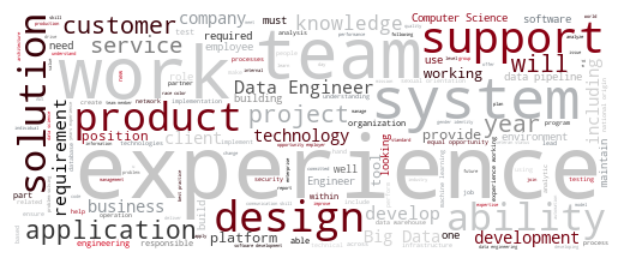

In [35]:
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['#d6001c', '#000', '#d7d7d7', '#6a737b'])

text = str(list(df['job_description'])).replace('\\n', '')

wordcloud = WordCloud(background_color = 'white', width = 500,  height = 200,colormap=cmap, max_words = 150).generate(text)

plt.figure( figsize=(5,5))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

Работодатели ожидают увидеть у соискатетей:  
- опыт работы (work expirience)
- умение работать в команде(team)
- опыт в дизайне (design)
- опыт в дизайне (support).

Остальные слова встречаются заметно реже.